<a href="https://colab.research.google.com/github/yudhiesh1997/Hands-On-Machine-Learning/blob/master/handsoMLCH7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning and Random Forest 

What if you pose a complex question to thousands of people, then aggregate their answers. In most cases the aggregated answer is better than the answer from an expert. This is called the *wisdom of the crowd*. 

Similarly, if you aggregate the predictions than with the best inndividual predictor. A group of predictos is called an *ensemble*, thus this tecnhique is called *Ensemble Learning*, and an Ensemble Learning algorithm is called an *Ensemble method*.

An example would be traininng a group of Decision Tree classfiers, each on a different random subset of the training set. To make predictionns, you obtainn the predictions of all the indiviual trees, then predict the class that gets the most votes. Such an ensemble of decision trees is called a *Random Forest*, 

## Voting Classifiers 

Say you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, an SVM classfier, a Random Forest classfier, a K-Nearest Neighbors classifier and a few more.

A simple way to create an even better classfier is to aggregate the predictions of each classifier and predict the class that gets the most votes. *i.e., the predictions with the most number of votes are chosen as the ensemble's prediction*.

Even if each classfier is a weak learner(meaning it does slightly better than random guessing), the ensemble can still be a strong learner provided there are a sufficient number of weak learners and they are sufficiently diverse. 

#### How is this possible?

Say you have a slightly biased coin that has a 51% chance of coming up heads and a 49% chance of coming up tails. If you toss it 1000 times, you will generally get mor or less 510 heads and 490 tails, and henve a majority heads. If you do the math the probability of obtaining a majority heads after 1000 tosses is close to 75%. The more you toss the coin the higher the probability it leans to the higher bias side of the coin. This is due to the concept of the *law of large numbers: as you keep tossing the coin, the ratio if heads gets closer and closer to the probability of heads (51%)*.

With building an ensemble containg 1000 classifiers that are individually correct only 51% of the time (barely better than random guessing). 

**However this is only true if all classifiers are perfectly independant, making uncorrelated errors, which is cleary not the case because they are trained on the same data. They are likely to make the same errors, so there will be a majority votes for the wrong class, reducing the models accuracy.**

**Ensemble methods work best when the predictors are as independennt from one another as possible. One way to get diverse classifers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, imporvinng the ensemble's accuracy.**


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [2]:
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 

X,y = make_moons(n_samples=500, noise= 0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression(solver = "lbfgs", random_state=42)
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svc_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', forest_clf), ('svc_clf', svc_clf)], voting="hard")

In [4]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [5]:
from sklearn.metrics import accuracy_score 

for clf in (log_clf, forest_clf, svc_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__} {accuracy_score(y_test, y_pred)}')


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [6]:
## Soft voting 

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(gamma="scale", random_state=42, probability=True)
voting2_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svc)], voting="soft")

In [7]:
voting2_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [8]:
for clf in (log_clf, rf_clf, svc, voting2_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'{clf.__class__.__name__} {accuracy_score(y_test, y_pred)}')
  

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## Bagging and Pasting 

One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is perfomed with replacement, this methods is called ***bagging***. When samping is performed without replacement it is called  ***pasting***.

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typicall the statistical mode or the most frequent prediction just like a hard voting classifier for a classification task or the average for a regression task. 

Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set. 

## Bagging Ensemble 

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred_bagging)

0.904

In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_tree_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_tree_pred)


0.856

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

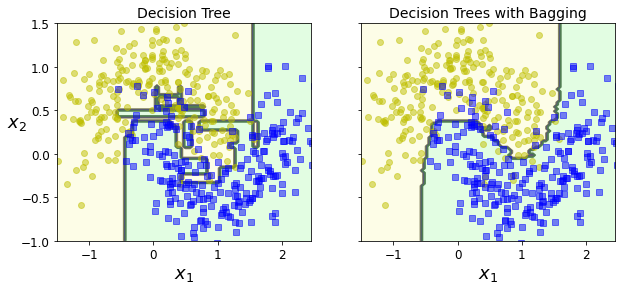

In [13]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

As you can see the ensemble model seems to generalize better than the single Decision Tree's predictions: the ensemble has a comparable bias but a smaller variance (it makes roughly the same number of errors on the training set, but the decision boundary is less irregular). 

Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting; but the extra diversity also means that the predictors end up being less correlated, so the ensemble's variance is reduced. Overall, bagging often results in better models, which explains why it is gerally preferred. 

## Out-of-Bag Evaluation 

With *bagging* some instances may be sampled several times for any given predictor while others may not be sampled at all. 

By default a BaggingClassifier samples *m* training instances with replacement. 

This means that only 63% of the data is actually sampled on average for each predictor and the other 37% are called *out-of-Bag(oob)* instances. 

With this we can actually use the oob instances to perform oob evaluation without the need for a seperate validation set. 

In [14]:
bag_clf_oob = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf_oob.fit(X_train,y_train)
print(f'oob prediction :{bag_clf_oob.oob_score_}')

oob prediction :0.8986666666666666


In [15]:
y_pred = bag_clf.predict(X_test)
print(f'Actual accuracy: {accuracy_score(y_test, y_pred)}')

Actual accuracy: 0.904


According to the oob score the classifier will achieve about 90% and it actually gets 91%

In [16]:
print(f' Decision function (predictions for each class):')
bag_clf_oob.oob_decision_function_

 Decision function (predictions for each class):


array([[0.32352941, 0.67647059],
       [0.35625   , 0.64375   ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97409326, 0.02590674],
       [0.7370892 , 0.2629108 ],
       [0.0049505 , 0.9950495 ],
       [0.75      , 0.25      ],
       [0.82681564, 0.17318436],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.34502924, 0.65497076],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65420561, 0.34579439],
       [0.

## Random Patch and Random Subspaces

The BaggingClassifier also supports sampling random features. 

Sampling of features is controlled by two hyperparameters *max_features* and *bootstrap_features*.

This technique is particularly useful when you are dealing with high-dimensional inputs such as images. 

Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance. 

## Random Forests

A Random Forest is an ensemble of Decision Trees 

The Random Forest algorithm introdues extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. 

The algorithm results in greater tree diversity, which trades a higher bias for a lower variance which generally yields a better model.



In [17]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train) 
y_pred_rf = rnd_clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.904

## Extremely Randomized Trees

When training a Random Forest, at each not only a random subset of the features is considered for splitting the trees. It is possible to make the trees even more random by setting a random threshold for each feature instead of the best possible feature.

This technique trades in a higher bias for a lower variance and it is also **faster to train** than a regular Random Forest as finding the best possible feature at each node is the most time consuming task. 

## Feature Importance 

Random Forest make it easy to measure the importance of a certain feature. 

Scikit-Learn does this by looking at how much the tree nodes that use that feature reduce the impurity on average across all trees in the forest. 

More precisely, it is a weighted average, where each node's weight is equal to the number of training samples that are associated with it. 

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [20]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(f'{name} {score}')

sepal length (cm) 0.10879719105604406
sepal width (cm) 0.023328309269266743
petal length (cm) 0.42478411736048655
petal width (cm) 0.4430903823142026


In [21]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version =1)
mnist.target = mnist.target.astype(np.uint8)

In [22]:
rnd_clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [23]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
  plt.axis("off")

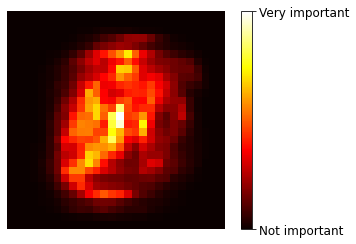

In [24]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

## Boosting 

*Boosting* refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are **AdaBoost** and **Gradient Boosting**.

## AdaBoost 

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictons focusing more and more on the hard cases. 

For example, the algorithm first trains a base classifier and uses it to make predictions. The algorithm then increases the relative weight of misclssified traininng instances. Then it trains a second classifier, using the updated updated weights and so on. 



In [25]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm = "SAMME.R", learning_rate=0.5, random_state=42
)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Scikit-Learn uses a multiclass of AdaBoost called SAMME(**Stagewise Additive Modeling using a Multiclass Exponential loss function**).

If the predictors can use the predict_proba or have class probabilities Scikit-Learn uses a variation called **SAMME.R** where the R stands for Real. 



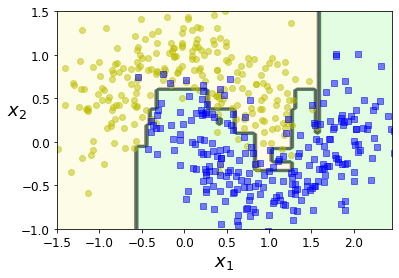

In [26]:
plot_decision_boundary(adaboost, X, y)

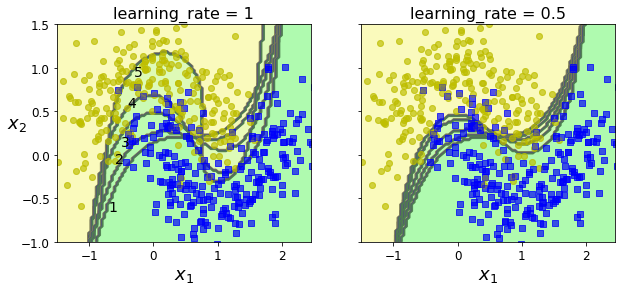

In [27]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

Each plot shows the five decision boundaries as they are trained on the updated weights from the previous training iteration. 

The learning rate determines how much the weights are boosted at each iteration i.e., 0
learning rate of 0.5 the weights are boosted by half at each iteration. 

**Downside:**

The problem with this method is that it is quite slow as weights from each iteration are used in the next iteration which causes it to now scale well to larger datasets. 

**Dealing with overfitting:**

Reduce the number of estimators or more strongly regularize the base estimators. 

## Gradient Boosting

Gradient Boosting works similarly to AdaBoost except instead of using the weights from the previous iteration it uses the residual error from the previous iteration to fit the predictor. 

#### Gradient Boosted Regression Trees

Using Gradient Boosting on a Decision Trees.

In [28]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [29]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)

tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
X_new = np.array([[0.8]])

In [33]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [34]:
y_pred

array([0.75026781])

In [35]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

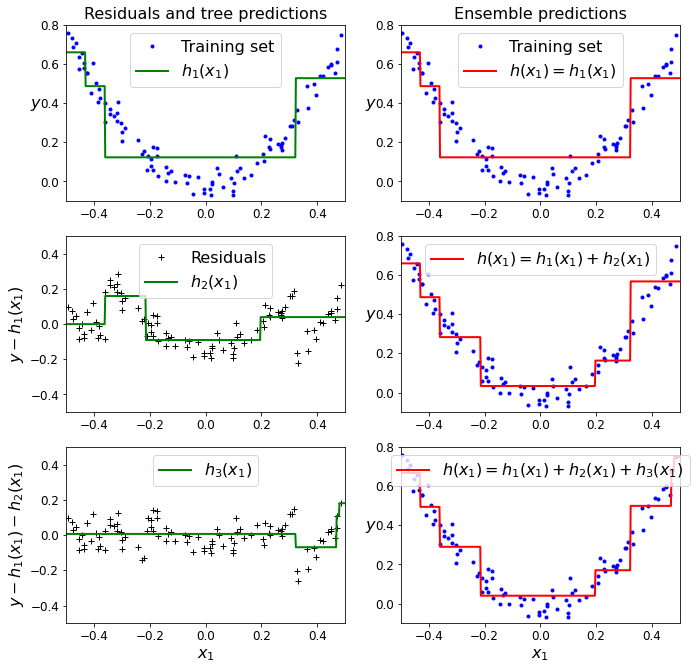

In [36]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

Plots on the left represent these three trees and on the right you have the ensemble predictions. It has only one tree thats why its exactly the same as the first plot of a single tree. 

You can see that the ensemble's predictions gradually get better as trees are adeed to the ensemble. 

In [37]:
# Simpler way using GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth= 2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The **learning rate hyperparameter** scales the contribution of each tree. If you set it to a low value, such as 0.1 you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This regularization technique is known as *shrinkage*.

In [38]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

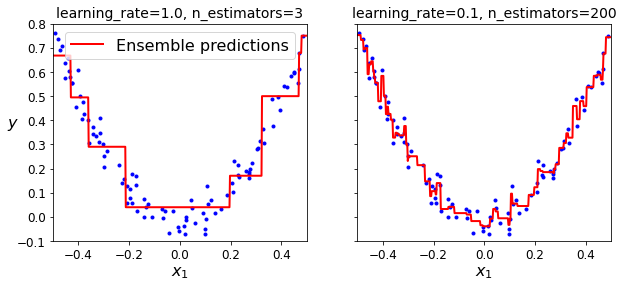

In [39]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

With not enough trees the model will underfit the training instances while if there are too many trees then it will overfit the training instances. 

#### Optimal way to find the number of trees:

Use early stopping 


In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train,X_val, y_train,y_val = train_test_split(X,y)

In [41]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=85,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
min_error = np.min(errors)

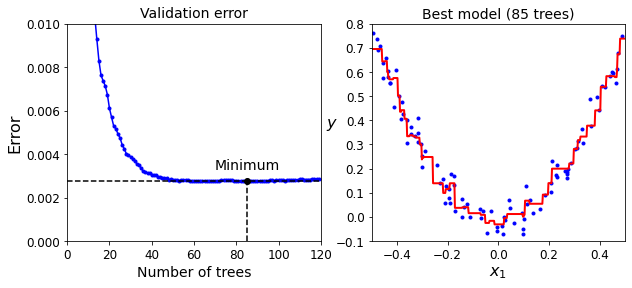

In [43]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [44]:
# alternative to going through all the trees and finding the optimal one 
# instead actually stop training early

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [45]:
print(gbrt.n_estimators)

69


In [46]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002750279033345716


## XGBoost library 

An optimized implementation of Gradient Boosting 

In [47]:
import xgboost 

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

[14:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
# XGBoost offers automatic early stopping 

xgb_reg.fit(X_train,y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

[14:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.275313
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.247499
[2]	validation_0-rmse:0.222947
[3]	validation_0-rmse:0.201049
[4]	validation_0-rmse:0.181641
[5]	validation_0-rmse:0.166735
[6]	validation_0-rmse:0.153621
[7]	validation_0-rmse:0.141686
[8]	validation_0-rmse:0.131314
[9]	validation_0-rmse:0.122047
[10]	validation_0-rmse:0.112234
[11]	validation_0-rmse:0.10366
[12]	validation_0-rmse:0.097232
[13]	validation_0-rmse:0.092018
[14]	validation_0-rmse:0.087123
[15]	validation_0-rmse:0.083105
[16]	validation_0-rmse:0.079681
[17]	validation_0-rmse:0.076621
[18]	validation_0-rmse:0.074141
[19]	validation_0-rmse:0.071896
[20]	validation_0-rmse:0.070115
[21]	validation_0-rmse:0.068281
[22]	validation_0-rmse:0.066894
[23]	validation_0-rmse:0.065783
[24]	validation_0-rmse:0.064704
[25]	validation_0-rm

## Stacking 

Stacked generalization 

Instead of using trivial functions such as hard voting to aggregate the predictions of all predictors in an ensemble, why don't we train a model to perform this aggregation?

To train the blender or the meta learner, a common approach is to use a hold-out set.

1. The training set is split into two subsets.
2. The first subset is used to train the predictors in the first layer.
3. The first layers predictions are used to make predictions on the second held out set. This ensures that the predictions are "clean", since the predictors never saw these instances. We can create a new training set using these preficted values as input features, and keeping the target values. The blender of the second subset is used to train the model so it learns to predict the tsrget value, given the first layer's predictions. 

It is possible to train several different blenders this way i.e., one using Linear Regression, one using Random Forest Regression etc.to get a whole layer of blenders. 

The trick is to split the training set into 3 subsets. 

The first one is used to train the first layer, the second one is used to create the training set used to train the second layer, and the third one is sued to crearte the training set to train the third layer. Once this is done you can make predictions for a new instance by going through each layer sequentially. 

## Exercises
1. If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?

  **You can try combining them into a voting ensemble, which will often give you even better results. It works better it the models are very different and it will be even better if they are trained on different instances using bagging or pasting.**

2. What is the difference between hard and soft voting classifiers?

  **A hard voting classifier just counts the votes of each classifier in the ensemble and picks the class with the greatest votes. A soft voting classifier computes the average estimated class probability for each class then picks the one with the highest probabiity. This gives high-confidence votes more weight and often performs better, but it works only if every classifier outputs the class probabilities or the predic_probab, SVM needs the probability=True for this to work.**

3. Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, Random Forests, or stacking ensembles?

  **Bagging & Pasting & Random Forest: Possible to speed up training since each predictor in the ensemble is independent from each other. Boosting: Each predictor is built based on the previous predictors results so training is necessarily sequential, and no gain will be seen. Stacking: All the predictors trained are independent from each other so they can be trained in parallel on multiple servers. However, the predictors in one layer can only be trained after the predictors in the previous layer have all been trained.**

4. What is the benefit of out-of-bag evaluation?

  **Each predictor in a bagging ensemble is evaluated using instances that it was not trained on. This makes it possible to have a fairly unbiased evaluatoon of the ensemble without the need for an additional validation set. Thus, you have more instances available for training and your ensemble will perform better.**

5. What makes Extra-Trees more random than regular Random Forests? How can this extra randomness help? Are Extra Trees slower or faster than regular Random Forests?

  **Extra Tree are more random as they use random thresholds for each feature when growing a tree. This extra randomness acts as a regularizer: if a Random Forest overfits the training instances then Extra Trees might perform even better. Also since they do not search for the best possible threshold they are much faster since this process is usually what takes up the most amount of time. However, they are neither slower or faster when it comes to making predictions.**

6. If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

  **You can try increasing the number of estimators or reducing the regularization hyperparameters of the base estimators. You can also try increasing the learning rate.**

7. If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

  **Decreasing the learning rate or you could use early stopping to findd the right number of predictors.**

8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for val‐ idation, and 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM classifier. Next, try to com‐ bine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?

9. Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on this new training set. Congratulations, you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s pre‐ dictions. How does it compare to the voting classifier you trained earlier?

## Exercise 8

In [50]:
mnist = fetch_openml('mnist_784', version =1)
mnist.target = mnist.target.astype(np.uint8)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

In [53]:
# Random Forest Classifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC

forest = RandomForestClassifier(n_estimators=100, random_state=42)
ex_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
svc = LinearSVC(random_state=42)

In [56]:
models = [forest, ex_trees, svc]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print(model.__class__.__name__)
  print(f'Accuracy: {accuracy_score(y_pred, y_val)}')

RandomForestClassifier
Accuracy: 0.9674
ExtraTreesClassifier
Accuracy: 0.9682
LinearSVC
Accuracy: 0.8678


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [67]:
estimators = [
  ("random_forest", forest),
  ("extra_trees", ex_trees),
  # ("svc", svc)
]

In [68]:
voting = VotingClassifier(estimators=estimators, voting="hard", n_jobs=-1)

In [69]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.

In [76]:
y_pred = voting.predict(X_val)
print(f'Accuracy of the voting classifier on val set {accuracy_score(y_pred, y_val)}')

Accuracy of the voting classifier on val set 0.9669


In [77]:
y_test_pred = voting.predict(X_test)
print(f'Accuracy score on the test set {accuracy_score(y_test_pred, y_test)}')

Accuracy score on the test set 0.9669
